# Double Well and Drift Diffusion Models

Colors will be used as following:
- Change of mu: blue.
- Change of sigma_s: hot.
- Change of sigma_i: violets

In [1]:
# Importing the libraries needed
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from PIL import Image
from scipy.stats import norm

# Importing the functions needed
import model_functions as mdl
import model_analysis as ma
import help_plot as hp

## Comparing the effect of mu
### Drift Diffusion Model

In [2]:
tau = 200 #ms
dt = tau/40 #ms
changing_mu, x_0 = [-0.5,0,0.5], 0
n_trials =1000
stimulus_duration = 1000 #ms
frames_duration = dt
bound = 0.5
alfa = 1
n_frames, dt_in_frame = stimulus_duration/dt, frames_duration/dt
sigma_i, sigma_s, xi_i, xi_s = 0.1, 0.1, 0.1, 0.2
# he utilitzat '.25' per fer les psicometriques

In [3]:
labels_mu= ['$\mu$ < 0','$\mu$ = 0','$\mu$ > 0']
colors_mu = ["lightskyblue","steelblue","navy"]

Text(0.5, -0.01, 'time (s)')

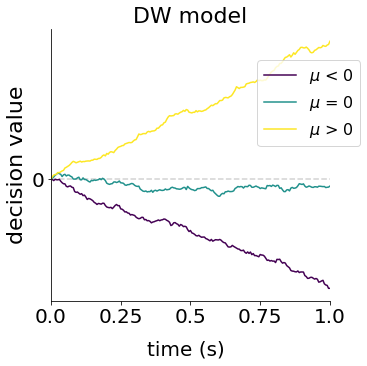

In [24]:
titles = ["DW model"]
fig, axs = plt.subplots(1,figsize=(5,5))
for i in range(len(changing_mu)):
    stimulus = np.random.randn(1, int(n_frames/dt_in_frame))
    # Creating the data for all models for one trial:
    pi = mdl.perfect_integrator(x_0,stimulus[0],dt_in_frame,dt,tau,changing_mu[i],sigma_i,sigma_s)
    ddm_a = mdl.DDM_absorbing(x_0,stimulus[0],dt_in_frame,n_frames,dt,tau,changing_mu[i],sigma_i,sigma_s,bound)
    ddm_r = mdl.DDM_reflecting(x_0,stimulus[0],dt_in_frame,dt,tau,changing_mu[i],sigma_i,sigma_s,bound)
    dw = mdl.DW(x_0,stimulus[0],dt_in_frame,dt,tau,changing_mu[i],alfa,sigma_i,sigma_s)
    # Plotting the data
    color_i = hp.colormap(cmap='viridis',ival=changing_mu[i],vmin=changing_mu[0],vmax=changing_mu[len(changing_mu)-1])
    axs.plot(np.arange(0,len(dw),1),pi,label=labels_mu[i],color = color_i)
#     axs[1].plot(np.arange(0,len(ddm_a),1),ddm_a,color = color_i)
#     axs[2].plot(np.arange(0,len(ddm_r),1),ddm_r,color = color_i)
#     axs[3].plot(np.arange(0,len(dw),1),dw,color = color_i)

# Setting the labels and other plot settings
for i in range(len(titles)):    
    axs.set_title(titles[i],fontsize = 22)
    hp.remove_axis(axs)
#     axs[i].set_xlabel("Time (s)",fontsize = 14)
    positions = [tau/4*n for n in range(5)]
    labels = [1/4*n for n in range(5)]
    hp.xticks(axs, positions, xticklabels=labels,fontsize=20)
    hp.yticks(axs, [x_0], yticklabels=[x_0],fontsize=20)
    axs.set_xlim([0,n_frames])
#     axs[i].set_ylim([])
#     axs[i].set_ylabel("Decision value",fontsize = 14)
#     axs[i].legend(fontsize = 12) # labels will have to be added in axs[1].plot and axs[2].plot
    axs.hlines(x_0,0,len(pi),linestyle='--',color='lightgray')
    
# axs[1].hlines(bound,0,len(pi),linestyle='--',color='lightgray')
# axs[1].hlines(-bound,0,len(pi),linestyle='--',color='lightgray')
# axs[2].hlines(bound,0,len(pi),linestyle='--',color='lightgray')
# axs[2].hlines(-bound,0,len(pi),linestyle='--',color='lightgray')

# axs[spines["left"].set_visible(False)
# axs[2].spines["left"].set_visible(False)

fig.legend(fontsize = 16,loc= [0.7,0.6])
axs.set_ylabel("decision value",fontsize = 22)
fig.text(0.5, -0.01, 'time (s)', ha='center', va='center',fontsize = 20)

# axs[1].yaxis.set_visible(False)
# axs[2].yaxis.set_visible(False)

# fig.suptitle("Comparing the effect of $\mu$ changes",fontsize = 20, y = 1.15)

# fig.text(0.1, 0.95, 'a.',fontsize = 14,weight = 'semibold')
# fig.text(0.375, 0.95, 'b.',fontsize = 14,weight = 'semibold')
# fig.text(0.65, 0.95, 'c.',fontsize = 14,weight = 'semibold')

In [33]:
start_mu, final_mu, step = -0.5, 0.5, 0.1

In [34]:
#Creating the synthetic data for different mu values:
# right_choice_PI = []
# right_choice_absorbing = []
# right_choice_reflecting = []
right_choice_DW = []

for mu in np.arange(start_mu, final_mu, step):
#     PI_trials, stimulus_PI = mdl.perfect_integrator_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame)
#     DDM_absorbing_trials, stimulus_list_absorbing = mdl.DDM_absorbing_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
#     DDM_reflecting_trials, stimulus_list_reflecting = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
    DW_trials, stimulus_DW = mdl. DW_data(x_0, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, n_frames, dt_in_frame)
#     right_choice_PI.append(ma.prob_right(PI_trials,mu)) 
#     right_choice_absorbing.append(ma.prob_right(DDM_absorbing_trials,mu)) 
#     right_choice_reflecting.append(ma.prob_right(DDM_reflecting_trials,mu)) 
    right_choice_DW.append(ma.prob_right(DW_trials,mu))

0

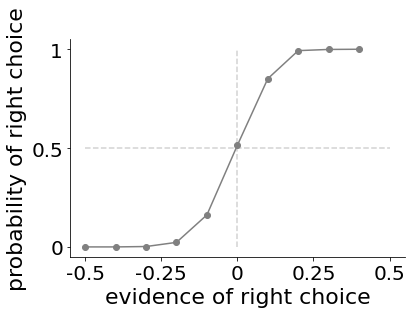

In [35]:
colors_mod = ["grey","black","cornflowerblue","blue"]
# Plotting the psychometric curve
fig, axs = plt.subplots()
# right_choice_list = [right_choice_PI,right_choice_absorbing,right_choice_reflecting]
# for i in range(len(right_choice_list)-2):
#     axs.plot(np.arange(start_mu, final_mu, step),right_choice_list[i],color = colors_mod[i],label = titles[i],marker="o")
axs.plot(np.arange(start_mu, final_mu, step),right_choice_DW,color = colors_mod[0],marker="o")
    

axs.set_ylabel("probability of right choice",fontsize = 22)
axs.set_xlabel("evidence of right choice",fontsize = 22)
# fig.suptitle("Psychometric curve",fontsize = 22)
plt.hlines(0.5,-0.5,0.5,linestyle='--',color='lightgrey')
plt.vlines(0,0,1,linestyle='--',color='lightgrey')
hp.yticks(axs, [0,0.5,1], yticklabels=[0,0.5,1],fontsize=20)
hp.xticks(axs, [-0.5,-0.25,0,0.25,0.5], xticklabels=[-0.5,-0.25,0,0.25,0.5],fontsize=20)
# axs.legend(fontsize=14)
hp.remove_axis(axs)

## Comparing the effect of sigma s

Text(0.5, -0.01, 'time (s)')

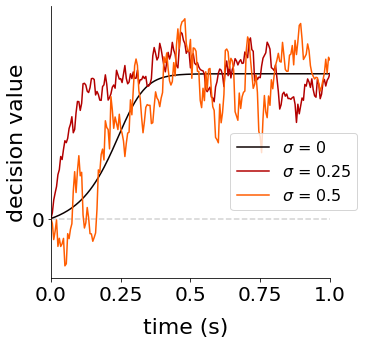

In [30]:
changing_sigmas = [0,0.25,0.5]
labels_sigmas = ["$\sigma$ = 0","$\sigma$ = 0.25","$\sigma$ = 0.5"]
mu = 0.1
sigma_i = 0
fig, axs = plt.subplots(1,figsize=(5,5))
for i in range(len(changing_sigmas)):
    stimulus = np.random.randn(1, int(n_frames/dt_in_frame))
    # Creating the data for all models for one trial:
#     pi = mdl.perfect_integrator(x_0,stimulus[0],dt_in_frame,dt,tau,mu,sigma_i,changing_sigmas[i])
#     ddm_a = mdl.DDM_absorbing(x_0,stimulus[0],dt_in_frame,n_frames,dt,tau,mu,sigma_i,changing_sigmas[i],bound)
#     ddm_r = mdl.DDM_reflecting(x_0,stimulus[0],dt_in_frame,dt,tau,mu,sigma_i,changing_sigmas[i],bound)
    dw = mdl.DW(x_0,stimulus[0],dt_in_frame,dt,tau,mu,alfa,sigma_i,changing_sigmas[i])
    # Plotting the data
    color_i = hp.colormap(cmap='hot',ival=changing_sigmas[i],vmin=changing_sigmas[0],vmax=1)
#     axs[0].plot(np.arange(0,len(pi),1),pi,label=labels_sigmas[i],color = color_i)
#     axs[1].plot(np.arange(0,len(ddm_a),1),ddm_a,color = color_i)
#     axs[2].plot(np.arange(0,len(ddm_r),1),ddm_r,color = color_i)
    axs.plot(np.arange(0,len(dw),1),dw,color = color_i,label =labels_sigmas[i] )

# Setting the labels and other plot settings
# for i in range(len(titles)):    
#     axs[i].set_title(titles[i],fontsize = 20)
hp.remove_axis(axs)
#     axs[i].set_xlabel("Time (s)",fontsize = 14)
positions = [tau/4*n for n in range(5)]
labels = [1/4*n for n in range(5)]
hp.xticks(axs, positions, xticklabels=labels,fontsize=20)
hp.yticks(axs, [x_0], yticklabels=[x_0],fontsize=20)
axs.set_xlim([0,n_frames])
#     axs[i].set_ylabel("Decision value",fontsize = 14)
#     axs[i].legend(fontsize = 12) # labels will have to be added in axs[1].plot and axs[2].plot
axs.hlines(x_0,0,len(pi),linestyle='--',color='lightgray')
# axs[0].set_ylim([-1.5,1.5])
# axs[1].hlines(bound,0,len(pi),linestyle='--',color='lightgray')
# axs[1].hlines(-bound,0,len(pi),linestyle='--',color='lightgray')
# axs[2].hlines(bound,0,len(pi),linestyle='--',color='lightgray')
# axs[2].hlines(-bound,0,len(pi),linestyle='--',color='lightgray')

# axs[1].spines["left"].set_visible(False)
# axs[2].spines["left"].set_visible(False)
# axs[1].yaxis.set_visible(False)
# axs[2].yaxis.set_visible(False)

fig.legend(fontsize = 16,loc = "center right")
axs.set_ylabel("decision value",fontsize = 22)
fig.text(0.5, -0.01, 'time (s)', ha='center', va='center',fontsize = 22)
# fig.suptitle("Comparing the effect of $\sigma$ changes",fontsize = 22, y = 1)

# fig.text(0.1, 0.95, 'a.',fontsize = 14,weight = 'semibold')
# fig.text(0.375, 0.95, 'b.',fontsize = 14,weight = 'semibold')
# fig.text(0.65, 0.95, 'c.',fontsize = 14,weight = 'semibold')

In [9]:
#Creating the synthetic data for different sigma_s values:
accuracy_PI = []
accuracy_absorbing = []
accuracy_reflecting = []
accuracy_DW = []
start_sigma_s, final_sigma_s, step = 0, 1.1, 0.1

for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    PI_trials, stimulus_list_PI = mdl.perfect_integrator_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame)
    DDM_absorbing_trials, stimulus_list_absorbing = mdl.DDM_absorbing_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
    DDM_reflecting_trials, stimulus_list_reflecting = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
#     DW_trials, stimulus_DW = mdl. DW_data(x_0, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, n_frames, dt_in_frame)
    accuracy_PI.append(ma.accuracy(PI_trials,sigma_s))
    accuracy_absorbing.append(ma.accuracy(DDM_absorbing_trials,sigma_s))
    accuracy_reflecting.append(ma.accuracy(DDM_reflecting_trials,sigma_s))
#     accuracy_DW.append(ma.accuracy(DW_trials,sigma_s))


0

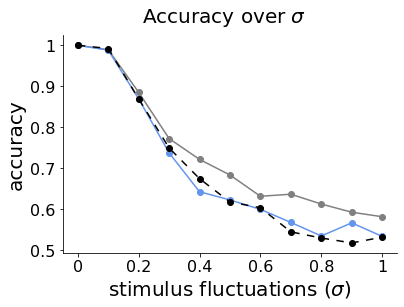

In [10]:
fig, axs = plt.subplots()
accuracy_models_list = [accuracy_PI,accuracy_absorbing,accuracy_reflecting]
for i in range(len(accuracy_models_list)-2):
    axs.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_models_list[i],color = colors_mod[i],label = titles[i],marker = "o")
axs.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_models_list[2],color = colors_mod[2],label = titles[2],marker = "o")
axs.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_models_list[1],color = colors_mod[1],label = titles[1],marker = "o",linestyle="dashed",dashes=(5, 5))


axs.set_ylabel("accuracy",fontsize=20)
axs.set_xlabel('stimulus fluctuations ($\sigma$)',fontsize=20)
fig.suptitle("Accuracy over $\sigma$",fontsize=20)
hp.xticks(axs, [0,0.2,0.4,0.6,0.8,1], xticklabels=[0,0.2,0.4,0.6,0.8,1],fontsize=16)
hp.yticks(axs, [0.5,0.6,0.7,0.8,0.9,1], yticklabels=[0.5,0.6,0.7,0.8,0.9,1],fontsize=16)
# plt.hlines(0.5,-0.5,0.5,linestyle='--',color='lightgrey')
# plt.vlines(0,0.05,0.95,linestyle='--',color='lightgrey')
# axs.legend(loc = 1)
hp.remove_axis(axs)

In [11]:
#Creating the synthetic data for different sigma_s values (only double well model) for different stimulus durations:
sigma_i = 0
n_trials = 1000
accuracy_DW_duration = []
start_sigma_s, final_sigma_s, step = 0, 1.1, 0.1
start_stim_duration, final_stim_duration, step_duration = 1000, 10000, 2000
changing_st_duration = np.arange(start_stim_duration,final_stim_duration,step_duration)

for stimulus_duration in changing_st_duration:
    accuracy_DW_onetime = []
    n_frames, dt_in_frame = stimulus_duration/dt, frames_duration/dt
    for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
        DW_trials, stimulus_DW = mdl. DW_data(x_0, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, n_frames, dt_in_frame)
        accuracy_DW_onetime.append(ma.accuracy(DW_trials,sigma_s))
    accuracy_DW_duration.append(accuracy_DW_onetime)

0

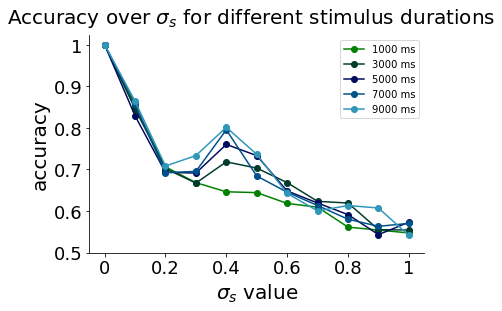

In [12]:
fig, axs = plt.subplots()
for i in range(len(accuracy_DW_duration)):
    color_i = hp.colormap(cmap='ocean',ival=changing_st_duration[i],vmin=changing_st_duration[0],vmax=12000)
    axs.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_DW_duration[i],color = color_i,marker = "o",label = str(changing_st_duration[i])+" ms")

axs.set_ylabel("accuracy",fontsize=20)
axs.set_xlabel("$\sigma_s$ value",fontsize=20)
fig.suptitle("Accuracy over $\sigma_s$ for different stimulus durations",fontsize=20)
# plt.hlines(0.5,-0.5,0.5,linestyle='--',color='lightgrey')
# plt.vlines(0,0.05,0.95,linestyle='--',color='lightgrey')
hp.xticks(axs, [0,0.2,0.4,0.6,0.8,1], xticklabels=[0,0.2,0.4,0.6,0.8,1],fontsize=18)
hp.yticks(axs, [0.5,0.6,0.7,0.8,0.9,1], yticklabels=[0.5,0.6,0.7,0.8,0.9,1],fontsize=18)
axs.legend()
hp.remove_axis(axs)

## Comparing the effect of sigma i

Text(0.5, 1.1, 'Comparing the effect of $\\sigma_i$ changes')

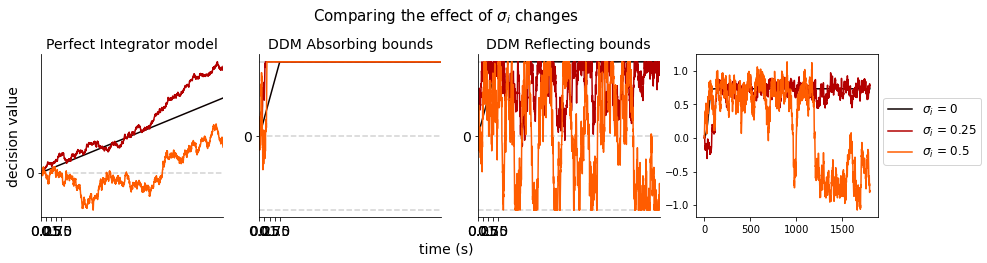

In [13]:
sigma_s = 0
changing_sigmai = [0,0.25,0.5]
labels_sigmai = ["$\sigma_i$ = 0","$\sigma_i$ = 0.25","$\sigma_i$ = 0.5"]
mu = 0.1
fig, axs = plt.subplots(1,4,figsize=(15,3))
for i in range(len(changing_sigmai)):
    stimulus = np.random.randn(1, int(n_frames/dt_in_frame))
    # Creating the data for all models for one trial:
    pi = mdl.perfect_integrator(x_0,stimulus[0],dt_in_frame,dt,tau,mu,changing_sigmai[i],sigma_s)
    ddm_a = mdl.DDM_absorbing(x_0,stimulus[0],dt_in_frame,n_frames,dt,tau,mu,changing_sigmai[i],sigma_s,bound)
    ddm_r = mdl.DDM_reflecting(x_0,stimulus[0],dt_in_frame,dt,tau,mu,changing_sigmai[i],sigma_s,bound)
    dw = mdl.DW(x_0,stimulus[0],dt_in_frame,dt,tau,mu,alfa,changing_sigmai[i],sigma_s)
    # Plotting the data
    color_i = hp.colormap(cmap='hot',ival=changing_sigmai[i],vmin=changing_sigmai[0],vmax=1)
    axs[0].plot(np.arange(0,len(pi),1),pi,label=labels_sigmai[i],color = color_i)
    axs[1].plot(np.arange(0,len(ddm_a),1),ddm_a,color = color_i)
    axs[2].plot(np.arange(0,len(ddm_r),1),ddm_r,color = color_i)
    axs[3].plot(np.arange(0,len(dw),1),dw,color = color_i)

# Setting the labels and other plot settings
for i in range(len(titles)):    
    axs[i].set_title(titles[i],fontsize = 14)
    hp.remove_axis(axs[i])
#     axs[i].set_xlabel("Time (s)",fontsize = 14)
    positions = [tau/4*n for n in range(5)]
    labels = [1/4*n for n in range(5)]
    hp.xticks(axs[i], positions, xticklabels=labels,fontsize=14)
    hp.yticks(axs[i], [x_0], yticklabels=[x_0],fontsize=14)
    axs[i].set_xlim([0,n_frames])
#     axs[i].set_ylabel("Decision value",fontsize = 14)
#     axs[i].legend(fontsize = 12) # labels will have to be added in axs[1].plot and axs[2].plot
    axs[i].hlines(x_0,0,len(pi),linestyle='--',color='lightgray')
    
axs[1].hlines(bound,0,len(pi),linestyle='--',color='lightgray')
axs[1].hlines(-bound,0,len(pi),linestyle='--',color='lightgray')
axs[2].hlines(bound,0,len(pi),linestyle='--',color='lightgray')
axs[2].hlines(-bound,0,len(pi),linestyle='--',color='lightgray')

fig.legend(fontsize = 12,loc = "center right")
axs[0].set_ylabel("decision value",fontsize = 14)
fig.text(0.5, -0.02, 'time (s)', ha='center', va='center',fontsize = 14)
fig.suptitle("Comparing the effect of $\sigma_i$ changes",fontsize = 15, y = 1.1)

# fig.text(0.1, 0.95, 'a.',fontsize = 14,weight = 'semibold')
# fig.text(0.375, 0.95, 'b.',fontsize = 14,weight = 'semibold')
# fig.text(0.65, 0.95, 'c.',fontsize = 14,weight = 'semibold')

In [14]:
start_sigma_i, final_sigma_i, step = 0, 1.1, 0.1
acc_sigmai_PI = []
acc_sigmai_absorbing = []
acc_sigmai_reflecting = []
acc_sigmai_DW = []

for sigma_i in np.arange(start_sigma_i, final_sigma_i, step):
    PI_trials, stimulus_list_PI = mdl.perfect_integrator_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame)
    DDM_absorbing_trials, stimulus_list_absorbing = mdl.DDM_absorbing_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
    DDM_reflecting_trials, stimulus_list_reflecting = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
    DW_trials, stimulus_DW = mdl. DW_data(x_0, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, n_frames, dt_in_frame)
    acc_sigmai_PI.append(ma.accuracy(PI_trials,sigma_i)) 
    acc_sigmai_absorbing.append(ma.accuracy(DDM_absorbing_trials,sigma_i)) 
    acc_sigmai_reflecting.append(ma.accuracy(DDM_reflecting_trials,sigma_i)) 
    acc_sigmai_DW.append(ma.accuracy(DW_trials,sigma_i)) 

KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots()
accuracy_sigma_i = [acc_sigmai_PI,acc_sigmai_absorbing,acc_sigmai_reflecting,acc_sigmai_DW]
for i in range(len(accuracy_sigma_i)):
    axs.plot(np.arange(start_sigma_i, final_sigma_i, step),accuracy_sigma_i[i],color = colors_mod[i],label = titles[i],marker = "o")

axs.set_ylabel("accuracy",fontsize=14)
axs.set_xlabel("$\sigma_i$ value",fontsize=14)
fig.suptitle("Accuracy over $\sigma_i$",fontsize=14)
# plt.hlines(0.5,-0.5,0.5,linestyle='--',color='lightgrey')
# plt.vlines(0,0.05,0.95,linestyle='--',color='lightgrey')
hp.xticks(axs, [0,0.2,0.4,0.6,0.8,1], xticklabels=[0,0.2,0.4,0.6,0.8,1],fontsize=14)
hp.yticks(axs, [0.5,0.6,0.7,0.8,0.9,1], yticklabels=[0.5,0.6,0.7,0.8,0.9,1],fontsize=14)
axs.legend()
hp.remove_axis(axs)

## Computing the temporal Psychophysical Kernel

In [17]:
sigma_s = 0.5
sigma_i = 0.2
mu = 0.1
n_trials = 1000

PI_trials, stimulus_list_PI = mdl.perfect_integrator_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame)
DDM_absorbing_trials, stimulus_list_absorbing = mdl.DDM_absorbing_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
DDM_reflecting_trials, stimulus_list_reflecting = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
pars_PI = ma.kernel(PI_trials,stimulus_list_PI)
pars_absorbing = ma.kernel(DDM_absorbing_trials,stimulus_list_absorbing)
pars_reflecting = ma.kernel(DDM_reflecting_trials,stimulus_list_reflecting)

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
kernels = [pars_PI,pars_absorbing,pars_reflecting]
fig, axs = plt.subplots(1,3,figsize=(15,3))
for i in range(len(kernels)):
    axs[i].plot(np.arange(0,len(kernels[i]),1),kernels[i],color = colors_mod[i])
    axs[i].set_title(titles[i],fontsize = 14)
    positions = [tau/4*n for n in range(5)]
    labels = [1/4*n for n in range(5)]
    hp.remove_axis(axs[i])
    hp.xticks(axs[i], positions, xticklabels=labels,fontsize=14)
    hp.yticks(axs[i], [0,1], yticklabels=[0,1],fontsize=14)
    axs[i].set_ylim([-0.1,0.5])

axs[0].set_ylabel("temporal PK",fontsize = 14)
axs[1].set_xlabel("time (s)",fontsize = 14)

fig.suptitle("Temporal Psychophysical Kernel",fontsize = 15, y = 1.1)

# fig.text(0.1, 0.95, 'a.',fontsize = 14,weight = 'semibold')
# fig.text(0.375, 0.95, 'b.',fontsize = 14,weight = 'semibold')
# fig.text(0.65, 0.95, 'c.',fontsize = 14,weight = 'semibold')

In [19]:
sigma_s = 0.5
sigma_i = 0.2
mu = 0.1
n_trials = 10000

DW_trials, stimulus_list_DW = mdl.DW_data(x_0, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, n_frames, dt_in_frame)
# DDM_absorbing_trials, stimulus_list_absorbing = mdl.DDM_absorbing_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
# DDM_reflecting_trials, stimulus_list_reflecting = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
pars_DW = ma.kernel(DW_trials,stimulus_list_DW)
# pars_absorbing = ma.kernel(DDM_absorbing_trials,stimulus_list_absorbing)
# pars_reflecting = ma.kernel(DDM_reflecting_trials,stimulus_list_reflecting)

Optimization terminated successfully.
         Current function value: 0.450983
         Iterations 7


Text(0.5, 1.1, 'Temporal Psychophysical Kernel')

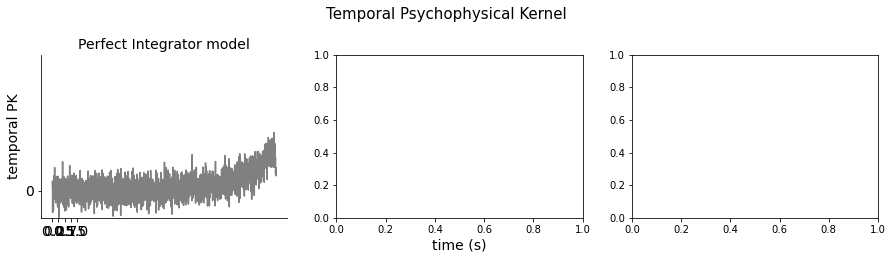

In [20]:
kernels = [pars_DW]
fig, axs = plt.subplots(1,3,figsize=(15,3))
for i in range(len(kernels)):
    axs[i].plot(np.arange(0,len(kernels[i]),1),kernels[i],color = colors_mod[i])
    axs[i].set_title(titles[i],fontsize = 14)
    positions = [tau/4*n for n in range(5)]
    labels = [1/4*n for n in range(5)]
    hp.remove_axis(axs[i])
    hp.xticks(axs[i], positions, xticklabels=labels,fontsize=14)
    hp.yticks(axs[i], [0,1], yticklabels=[0,1],fontsize=14)
    axs[i].set_ylim([-0.1,0.5])

axs[0].set_ylabel("temporal PK",fontsize = 14)
axs[1].set_xlabel("time (s)",fontsize = 14)

fig.suptitle("Temporal Psychophysical Kernel",fontsize = 15, y = 1.1)

# fig.text(0.1, 0.95, 'a.',fontsize = 14,weight = 'semibold')
# fig.text(0.375, 0.95, 'b.',fontsize = 14,weight = 'semibold')
# fig.text(0.65, 0.95, 'c.',fontsize = 14,weight = 'semibold')

In [59]:
changing_sigmas = [0.3,0.6,1]
pars_DW = []
n_trials = 10000
mu = 0.2
for i in range(len(changing_sigmas)):
    DW_trials, stimulus_DW = mdl.DW_data(x_0, dt, tau, mu, sigma_i, changing_sigmas[i], alfa, n_trials, n_frames, dt_in_frame)
#     DW_trials, stimulus_DW = mdl. DW_data(x_0, dt, tau, mu, sigma_i, changing_sigmas[i], alfa, n_trials, n_frames, dt_in_frame)
    pars = ma.kernel(DW_trials,stimulus_DW)
    pars_DW.append(pars)

Optimization terminated successfully.
         Current function value: 0.477819
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491525
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300772
         Iterations 8


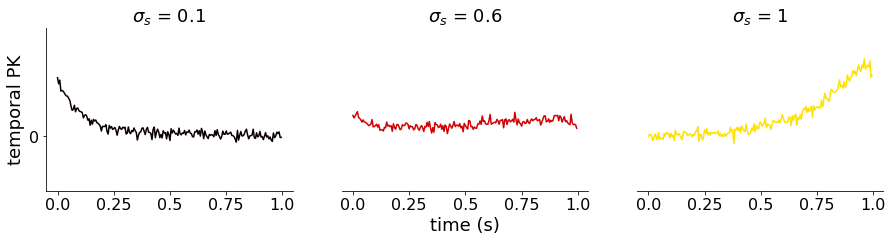

In [61]:
title_pk = ["$\sigma_s$ = 0.1","$\sigma_s$ = 0.6","$\sigma_s$ = 1"]
fig, axs = plt.subplots(1,3,figsize=(15,3))
for i in range(len(pars_DW)):
    color_i = hp.colormap(cmap='hot',ival=changing_sigmas[i],vmin=changing_sigmas[0],vmax=1.3)
    axs[i].plot(np.arange(0,len(pars_DW[i]),1),pars_DW[i],color = color_i)
    axs[i].set_title(title_pk[i],fontsize = 18)
    positions = [tau/4*n for n in range(5)]
    labels = [1/4*n for n in range(5)]
    hp.remove_axis(axs[i])
    hp.xticks(axs[i], positions, xticklabels=labels,fontsize=16)
    hp.yticks(axs[i], [0], yticklabels=[0],fontsize=16)
    axs[i].set_ylim([-0.5,1])

axs[0].set_ylabel("temporal PK",fontsize = 18)
axs[1].set_xlabel("time (s)",fontsize = 18)
# fig.suptitle("Temporal Psychophysical Kernel",fontsize = 20, y = 1)
axs[1].spines["left"].set_visible(False)
axs[2].spines["left"].set_visible(False)
axs[1].yaxis.set_visible(False)
axs[2].yaxis.set_visible(False)



In [33]:
changing_sigmas = [0.2,0.6,0.9]
pars_DW = []
n_trials = 10000
for i in range(len(changing_sigmas)):
#     DW_trials, stimulus_DW = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, changing_sigmas[i], sigma_s, xi_s, n_trials, n_frames, dt_in_frame,bound)
    DW_trials, stimulus_DW = mdl. DW_data(x_0, dt, tau, mu, sigma_i, changing_sigmas[i], alfa, n_trials, n_frames, dt_in_frame)
    pars = ma.kernel(DW_trials,stimulus_DW)
    pars_DW.append(pars)

Optimization terminated successfully.
         Current function value: 0.338585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398671
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290278
         Iterations 8


In [37]:
# Spatial kernel
n_trials = 50000
PI_trials, stimulus_PI = mdl.DW_data(x_0, dt, tau, mu, sigma_i,0.2, alfa, n_trials, n_frames, dt_in_frame)




Optimization terminated successfully.
         Current function value: 0.073577
         Iterations 9


0

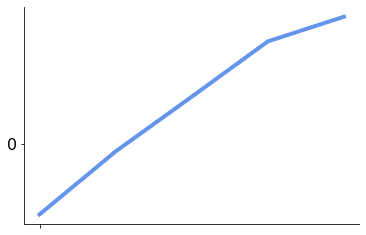

In [38]:
t_stim = []
for stim in stimulus_PI:
    stim_sorted = np.sort(stim)
    hist, base = np.histogram(stim,bins = 5,range = (-1,1))
    t_stim.append(hist)
pk = ma.kernel(PI_trials,t_stim)



# axs.spines["left"].set_visible(False)
# axs.spines["bottom"].set_visible(False)
# axs.yaxis.set_visible(False)
# axs.xaxis.set_visible(False)


# axs.set_ylim([-0.5,1.5])

Text(0.5, 0, 'stimulus fluctuations')

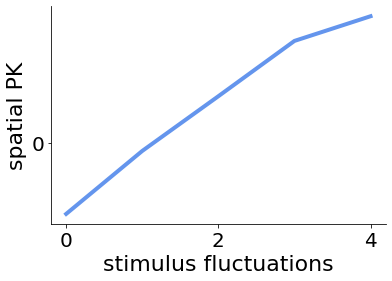

In [40]:

fig,axs = plt.subplots()
axs.plot(np.arange(0,len(pk),1),pk,color ="cornflowerblue",linewidth=4)
# axs.set_title(title_pk[i],fontsize = 20)
positions = [tau/4*n for n in range(5)]
labels = [1/4*n for n in range(5)]
hp.remove_axis(axs)
hp.xticks(axs, [0,2,4], xticklabels=[0,2,4],fontsize=20)
hp.yticks(axs, [0], yticklabels=[0],fontsize=20)
axs.set_ylabel("spatial PK",fontsize=22)
axs.set_xlabel("stimulus fluctuations", fontsize = 22)

In [26]:
mins = 1
maxs = 0
for st in stimulus_PI:
    if min(st) < mins:
        mins = min(st)
for st in stimulus_PI:
    if max(st) > maxs:
        maxs = max(st)    
print(mins)
print(maxs)

-5.306136407292011
5.088942464176363


Text(0, 0.5, 'spatial PK')

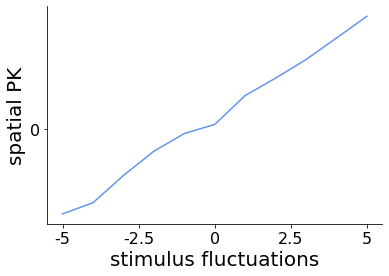

In [38]:
fig,axs = plt.subplots()
axs.plot(np.arange(0,len(pk),1),pk,color ="cornflowerblue")
#     axs[i].set_title(title_pk[i],fontsize = 20)
positions = [tau/4*n for n in range(5)]
labels = [1/4*n for n in range(5)]
hp.remove_axis(axs)

hp.xticks(axs, [0,2.5,5,7.5,10], xticklabels=[-5,-2.5,0,2.5,5],fontsize=16)
hp.yticks(axs, [0], yticklabels=[0],fontsize=16)

axs.set_xlabel("stimulus fluctuations",fontsize = 20)
axs.set_ylabel("spatial PK",fontsize = 20)

# fig.suptitle("DDM Reflecting",fontsize = 20, y = 1)
# axs[1].spines["left"].set_visible(False)
# axs[2].spines["left"].set_visible(False)
# axs[1].yaxis.set_visible(False)
# axs[2].yaxis.set_visible(False)

# axs.spines["left"].set_visible(False)
# axs.spines["bottom"].set_visible(False)
# axs.yaxis.set_visible(False)
# axs.xaxis.set_visible(False)

In [ ]:
# Spatial kernel
n_trials = 10000
mu = 0.2
PI_trials, stimulus_PI = mdl.DDM_reflecting_data(x_0, dt, tau, mu, sigma_i, xi_i, 0.2, xi_s, n_trials, n_frames, dt_in_frame,bound)

t_stim = []
for stim in stimulus_PI:
    stim_sorted = np.sort(stim)
    hist, base = np.histogram(stim,bins = 11,range = (-1,1))
    t_stim.append(hist)
pk = ma.kernel(PI_trials,t_stim)

fig,axs = plt.subplots()
axs.plot(np.arange(0,len(pk),1),pk,color ="cornflowerblue")
#     axs[i].set_title(title_pk[i],fontsize = 20)
positions = [tau/4*n for n in range(5)]
labels = [1/4*n for n in range(5)]
hp.remove_axis(axs)
hp.xticks(axs, [0], xticklabels=[""],fontsize=16)
hp.yticks(axs, [0], yticklabels=[0],fontsize=16)


# axs.spines["left"].set_visible(False)
axs.spines["bottom"].set_visible(False)
# axs.yaxis.set_visible(False)
axs.xaxis.set_visible(False)
axs.set_ylabel("spatial PK",fontsize = 20)


# axs.set_ylim([-0.5,1.5])
